In [54]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

In [5]:
hurricanes = pd.read_csv('./data/Hurricanes.csv', sep=';')

In [6]:
hurricanes

,name,year,deaths,category,min_pressure,damage_norm,female,femininity
0,Easy,1950,2,3,960,1590,1,6.77778
1,King,1950,4,3,955,5350,0,1.38889
2,Able,1952,3,1,985,150,0,3.83333
3,Barbara,1953,1,1,987,58,1,9.83333
4,Florence,1953,0,1,985,15,1,8.33333
...,...,...,...,...,...,...,...,...
87,Gustav,2008,52,2,954,4360,0,1.72222
88,Ike,2008,84,2,950,20370,0,1.88889
89,Irene,2011,41,1,952,7110,1,9.27778
90,Isaac,2012,5,1,966,24000,0,1.94444


Text(0.5, 0, 'femeninity')

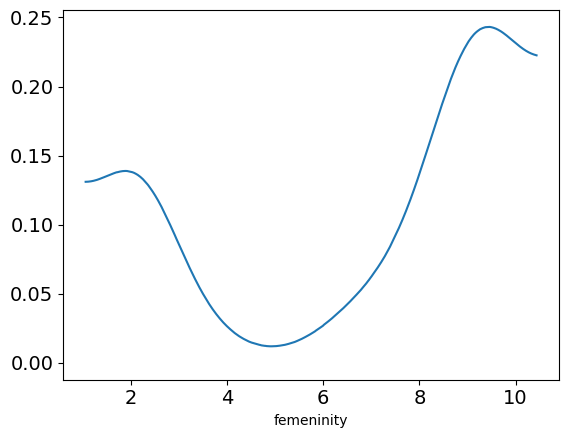

In [111]:
az.plot_kde(hurricanes.femininity)
plt.xlabel('femeninity')

Text(0, 0.5, 'Deaths')

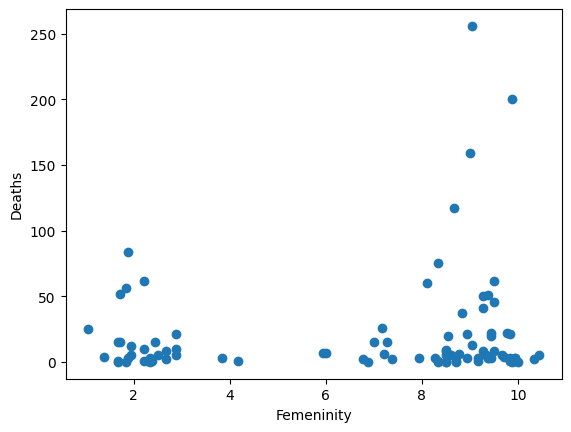

In [112]:
plt.scatter(hurricanes.femininity, hurricanes.deaths)
plt.xlabel("Femeninity")
plt.ylabel("Deaths")

In [135]:
with pm.Model() as m1:
    femininity = pm.MutableData('femeninity', hurricanes.femininity)
    alpha = pm.Normal('alpha',0, 4.5)
    beta = pm.Normal('beta_feminity', 0, 0.8)
    lam = pm.Deterministic('lam', pm.math.exp(alpha + beta * femininity))
    deaths = pm.Poisson("deaths", lam, observed=hurricanes.deaths)

with pm.Model() as m2:
    alpha = pm.Normal('alpha',0, 4.5)
    lam = pm.Deterministic('lam', pm.math.exp(alpha))
    deaths = pm.Poisson("deaths", lam, observed=hurricanes.deaths)

In [136]:
with m1:
    trace_m1 = pm.sample()

with m2:
    trace_m2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_feminity]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
The acceptance probability does not match the target. It is 0.8848, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7192, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


In [137]:
az.summary(trace_m1, var_names=['alpha', 'beta_feminity'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.501,0.061,2.384,2.611,0.002,0.001,1062.0,1066.0,1.0
beta_feminity,0.074,0.008,0.060,0.088,0.000,0.000,1059.0,995.0,1.0


In [138]:
az.summary(trace_m2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.028,0.023,2.986,3.071,0.001,0.000,1663.0,2602.0,1.0
lam,20.664,0.480,19.791,21.559,0.012,0.008,1663.0,2602.0,1.0


In [139]:
az.loo(trace_m1)

/Users/ciguaran/personal/statistical_rethinking/venv/lib/python3.7/site-packages/arviz/stats/stats.py:813: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


Computed from 4000 posterior samples and 92 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2185.36   488.16
p_loo      110.09        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       85   92.4%
 (0.5, 0.7]   (ok)          2    2.2%
   (0.7, 1]   (bad)         2    2.2%
   (1, Inf)   (very bad)    3    3.3%

In [140]:
az.loo(trace_m2)

/Users/ciguaran/personal/statistical_rethinking/venv/lib/python3.7/site-packages/arviz/stats/stats.py:813: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


Computed from 4000 posterior samples and 92 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2214.55   530.96
p_loo       70.17        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       88   95.7%
 (0.5, 0.7]   (ok)          1    1.1%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    3    3.3%

In [141]:
with m1:
    pp_m1 = pm.sample_posterior_predictive(trace_m1)

with m2:
    pp_m2 = pm.sample_posterior_predictive(trace_m2)

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

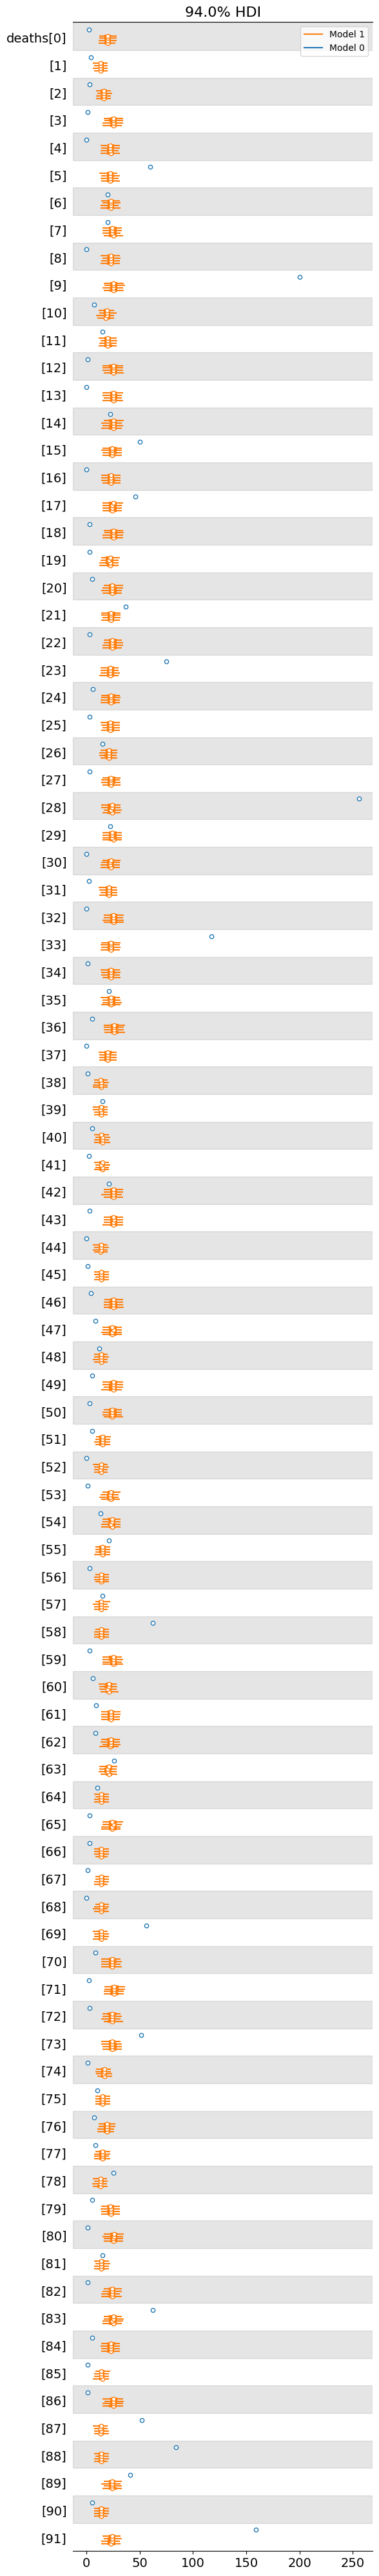

In [142]:
az.plot_forest([{"deaths":np.atleast_2d(np.array(hurricanes.deaths)).reshape(1,1,92)}, pp_m1.posterior_predictive['deaths']])

In [143]:
hurricanes["mean_m1"] =  pp_m1.posterior_predictive.mean(["chain", "draw"])["deaths"].to_numpy()

In [144]:
to_plot

,name,year,deaths,category,min_pressure,damage_norm,female,femininity,mean_m1
5,Carol,1954,60,3,960,19321,1,8.11111,22.16925
6,Edna,1954,20,3,954,3230,1,8.55556,22.91100
7,Hazel,1954,20,4,938,24260,1,9.44444,24.49875
9,Diane,1955,200,1,987,14730,1,9.88889,25.35600
11,Flossy,1956,15,2,975,1540,1,7.00000,20.38975
14,Gracie,1959,22,3,950,510,1,9.77778,25.28400
15,Donna,1960,50,4,930,53270,1,9.27778,24.40700
17,Carla,1961,46,4,931,15850,1,9.50000,24.71175
21,Hilda,1964,37,3,950,2770,1,8.83333,23.39950
23,Betsy,1965,75,3,948,20000,1,8.33333,22.41700


In [183]:
def plot_counter(model, trace):
    femininity_to_plot = np.linspace(0,12, 200)
    with model:
        pm.set_data({'femeninity': femininity_to_plot})
        pp_intervened = pm.sample_posterior_predictive(trace).posterior_predictive['deaths']
    plt.scatter(hurricanes.femininity, hurricanes.deaths)
    az.plot_hdi(femininity_to_plot, pp_intervened)
    plt.xlabel('femeninity')
    plt.ylabel('deaths')
    

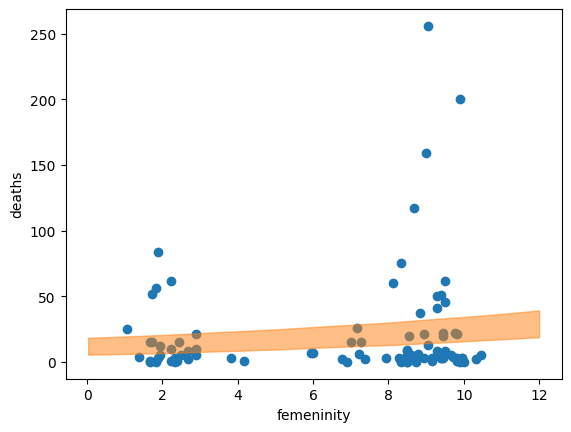

In [184]:
plot_counter(m1, trace_m1)

array([[<AxesSubplot:title={'center':'beta_feminity'}>,
        <AxesSubplot:title={'center':'beta_feminity'}>]], dtype=object)

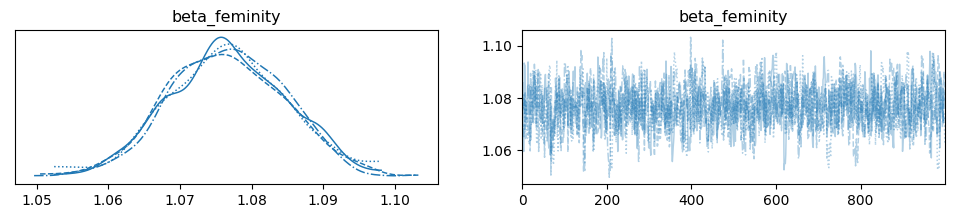

In [160]:
az.plot_trace(np.exp(trace_m1.posterior['beta_feminity']))

In [163]:
with pm.Model() as m3:
    femininity = pm.MutableData('femeninity', hurricanes.femininity)
    alpha = pm.Normal('alpha',0, 4.5)
    beta = pm.Normal('beta_feminity', 0, 0.8)
    lam = pm.Deterministic('lam', pm.math.exp(alpha + beta * femininity))
    scale = pm.Exponential('scale',1)
    deaths = pm.NegativeBinomial("deaths", lam, scale, observed=hurricanes.deaths)

In [164]:
with m3: 
    trace_m3 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_feminity, scale]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.


In [177]:
az.summary(trace_m3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.566,0.374,1.889,3.295,0.010,0.007,1315.0,1483.0,1.00
beta_feminity,0.068,0.049,-0.025,0.158,0.001,0.001,1395.0,1642.0,1.01
scale,0.455,0.063,0.341,0.575,0.001,0.001,1951.0,1882.0,1.00
lam[0],20.827,3.403,15.075,27.332,0.058,0.043,3632.0,2731.0,1.00
lam[1],15.033,5.102,7.143,24.296,0.145,0.110,1394.0,1556.0,1.00
...,...,...,...,...,...,...,...,...,...
lam[87],15.306,4.940,7.612,24.280,0.139,0.105,1411.0,1588.0,1.00
lam[88],15.446,4.859,7.804,24.307,0.136,0.103,1422.0,1622.0,1.00
lam[89],24.832,5.082,15.912,34.173,0.092,0.067,3180.0,2951.0,1.00
lam[90],15.494,4.833,7.958,24.370,0.136,0.102,1425.0,1659.0,1.00


array([[<AxesSubplot:title={'center':'beta_feminity'}>,
        <AxesSubplot:title={'center':'beta_feminity'}>]], dtype=object)

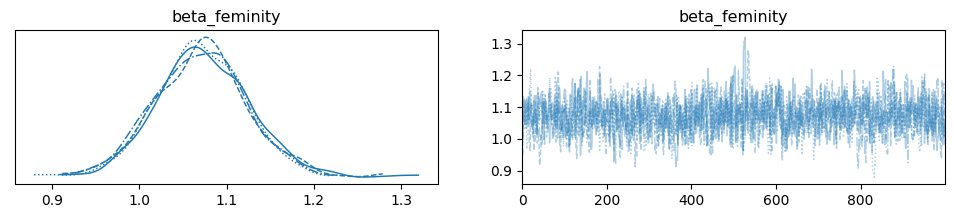

In [178]:
az.plot_trace(np.exp(trace_m3.posterior['beta_feminity']))

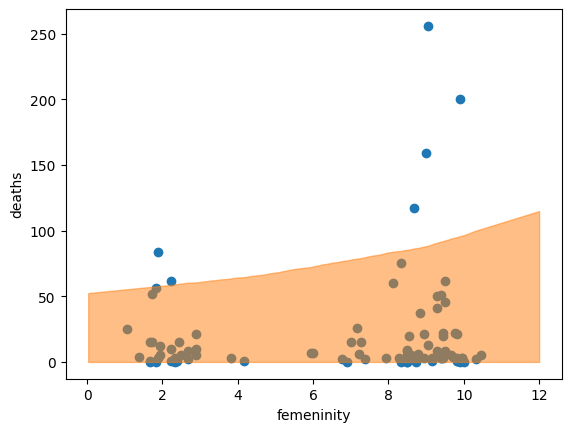

In [185]:
plot_counter(m3, trace_m3)

In [186]:
az.summary(trace_m3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.566,0.374,1.889,3.295,0.010,0.007,1315.0,1483.0,1.00
beta_feminity,0.068,0.049,-0.025,0.158,0.001,0.001,1395.0,1642.0,1.01
scale,0.455,0.063,0.341,0.575,0.001,0.001,1951.0,1882.0,1.00
lam[0],20.827,3.403,15.075,27.332,0.058,0.043,3632.0,2731.0,1.00
lam[1],15.033,5.102,7.143,24.296,0.145,0.110,1394.0,1556.0,1.00
...,...,...,...,...,...,...,...,...,...
lam[87],15.306,4.940,7.612,24.280,0.139,0.105,1411.0,1588.0,1.00
lam[88],15.446,4.859,7.804,24.307,0.136,0.103,1422.0,1622.0,1.00
lam[89],24.832,5.082,15.912,34.173,0.092,0.067,3180.0,2951.0,1.00
lam[90],15.494,4.833,7.958,24.370,0.136,0.102,1425.0,1659.0,1.00


In [187]:
az.summary(trace_m1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.501,0.061,2.384,2.611,0.002,0.001,1062.0,1066.0,1.0
beta_feminity,0.074,0.008,0.060,0.088,0.000,0.000,1059.0,995.0,1.0
lam[0],20.108,0.471,19.184,20.947,0.009,0.006,2679.0,2962.0,1.0
lam[1],13.525,0.699,12.195,14.778,0.021,0.015,1091.0,1075.0,1.0
lam[2],16.187,0.580,15.023,17.172,0.016,0.012,1244.0,1307.0,1.0
...,...,...,...,...,...,...,...,...,...
lam[87],13.860,0.685,12.581,15.118,0.021,0.015,1101.0,1090.0,1.0
lam[88],14.031,0.677,12.757,15.266,0.020,0.015,1106.0,1096.0,1.0
lam[89],24.183,0.648,22.993,25.459,0.012,0.009,2867.0,2730.0,1.0
lam[90],14.088,0.675,12.810,15.310,0.020,0.014,1108.0,1096.0,1.0


In [189]:
az.compare({'Poisson': trace_m1, "GammaPoisson":trace_m3})

/Users/ciguaran/personal/statistical_rethinking/venv/lib/python3.7/site-packages/arviz/stats/stats.py:813: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
GammaPoisson,0,-354.842890,3.661018,0.000000,1.0,15.995332,0.000000,False,log
Poisson,1,-2185.364995,110.087544,1830.522105,0.0,488.155223,477.386595,True,log


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

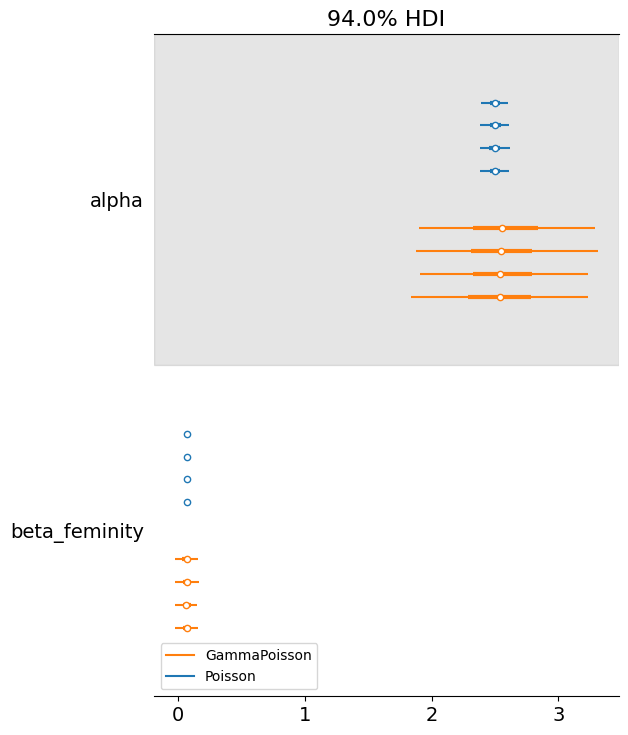

In [194]:
az.plot_forest([trace_m1,trace_m3], model_names = ['Poisson', 'GammaPoisson'],var_names = ['alpha', 'beta_feminity'])

# 12H3

In [204]:
def stdz(series: pd.Series):
    return (series - series.mean())/series.std()

for col in ["femininity", "min_pressure", "damage_norm"]:
    hurricanes[f"{col}_std"] = stdz(hurricanes[col])
    
with pm.Model() as m4:
    femininity = pm.MutableData('femeninity', hurricanes.femininity_std)
    damage = pm.MutableData('damage', hurricanes.damage_norm_std)
    alpha = pm.Normal('alpha',0, 4.5)
    beta = pm.Normal('beta_feminity', 0, 0.8)
    beta_damage = pm.Normal('beta_damage', 0, 0.8)
    lam = pm.Deterministic('lam', pm.math.exp(alpha + beta * femininity + beta_damage * damage))
    scale = pm.Exponential('scale',1)
    deaths = pm.NegativeBinomial("deaths", lam, scale, observed=hurricanes.deaths)

In [206]:
with pm.Model() as m5:
    femininity = pm.MutableData('femeninity', hurricanes.femininity_std)
    damage = pm.MutableData('damage', hurricanes.damage_norm_std)
    alpha = pm.Normal('alpha',0, 4.5)
    beta = pm.Normal('beta_feminity', 0, 0.8)
    beta_damage = pm.Normal('beta_damage', 0, 0.8)
    beta_int = pm.Normal('beta_int', 0, 0.8)
    lam = pm.Deterministic('lam', pm.math.exp((alpha 
                                               + beta * femininity 
                                               + beta_damage * damage 
                                               + beta_int * damage * femininity)))
    scale = pm.Exponential('scale',1)
    deaths = pm.NegativeBinomial("deaths", lam, scale, observed=hurricanes.deaths)

In [207]:
with m4:
    trace_m4 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_feminity, beta_damage, scale]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


In [208]:
with m5:
    trace_m5 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_feminity, beta_damage, beta_int, scale]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


In [211]:
az.compare({'m1':trace_m1,
            'm2':trace_m2,
            'm3':trace_m3,
            'm4':trace_m4, 
            'm5':trace_m5})

/Users/ciguaran/personal/statistical_rethinking/venv/lib/python3.7/site-packages/arviz/stats/stats.py:813: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/Users/ciguaran/personal/statistical_rethinking/venv/lib/python3.7/site-packages/arviz/stats/stats.py:813: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
m4,0,-335.246775,5.247685,0.000000,5.253844e-01,16.598474,0.000000,False,log
m5,1,-335.465266,6.875969,0.218491,4.746156e-01,16.785320,2.126214,False,log
m3,2,-354.842890,3.661018,19.596115,1.536244e-14,15.995332,4.714063,False,log
m1,3,-2185.364995,110.087544,1850.118220,8.640587e-15,488.155223,479.162629,True,log
m2,4,-2214.546455,70.174922,1879.299680,0.000000e+00,530.957933,522.153371,True,log


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

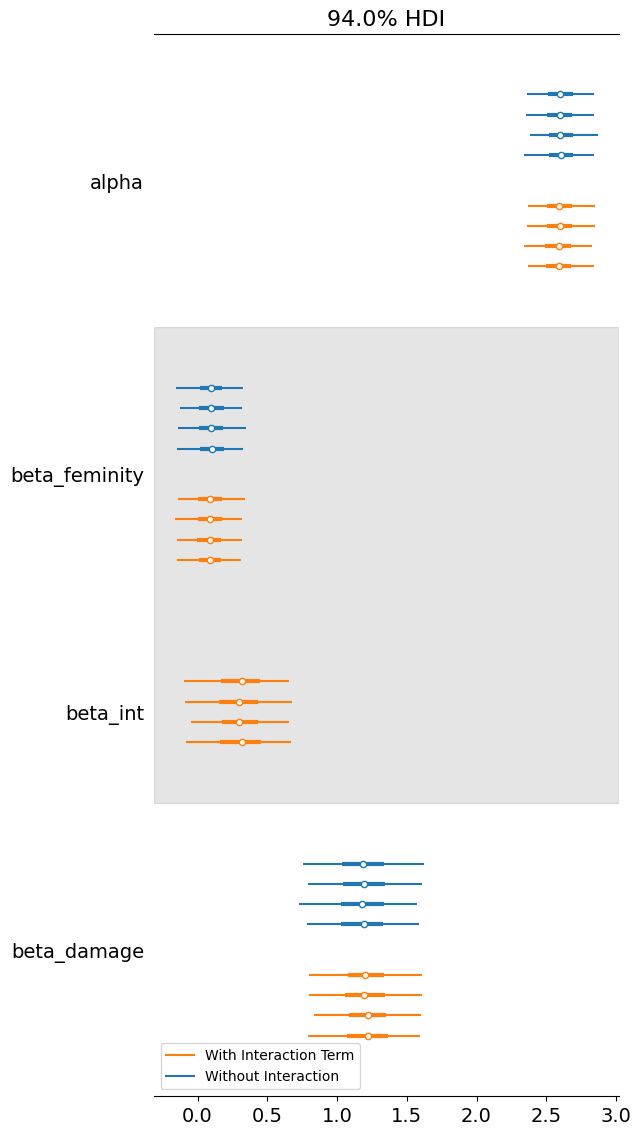

In [213]:
az.plot_forest([trace_m4,trace_m5],
               model_names = ['Without Interaction', 'With Interaction Term'],
               var_names = ['alpha', 'beta_feminity', 'beta_int', 'beta_damage'])

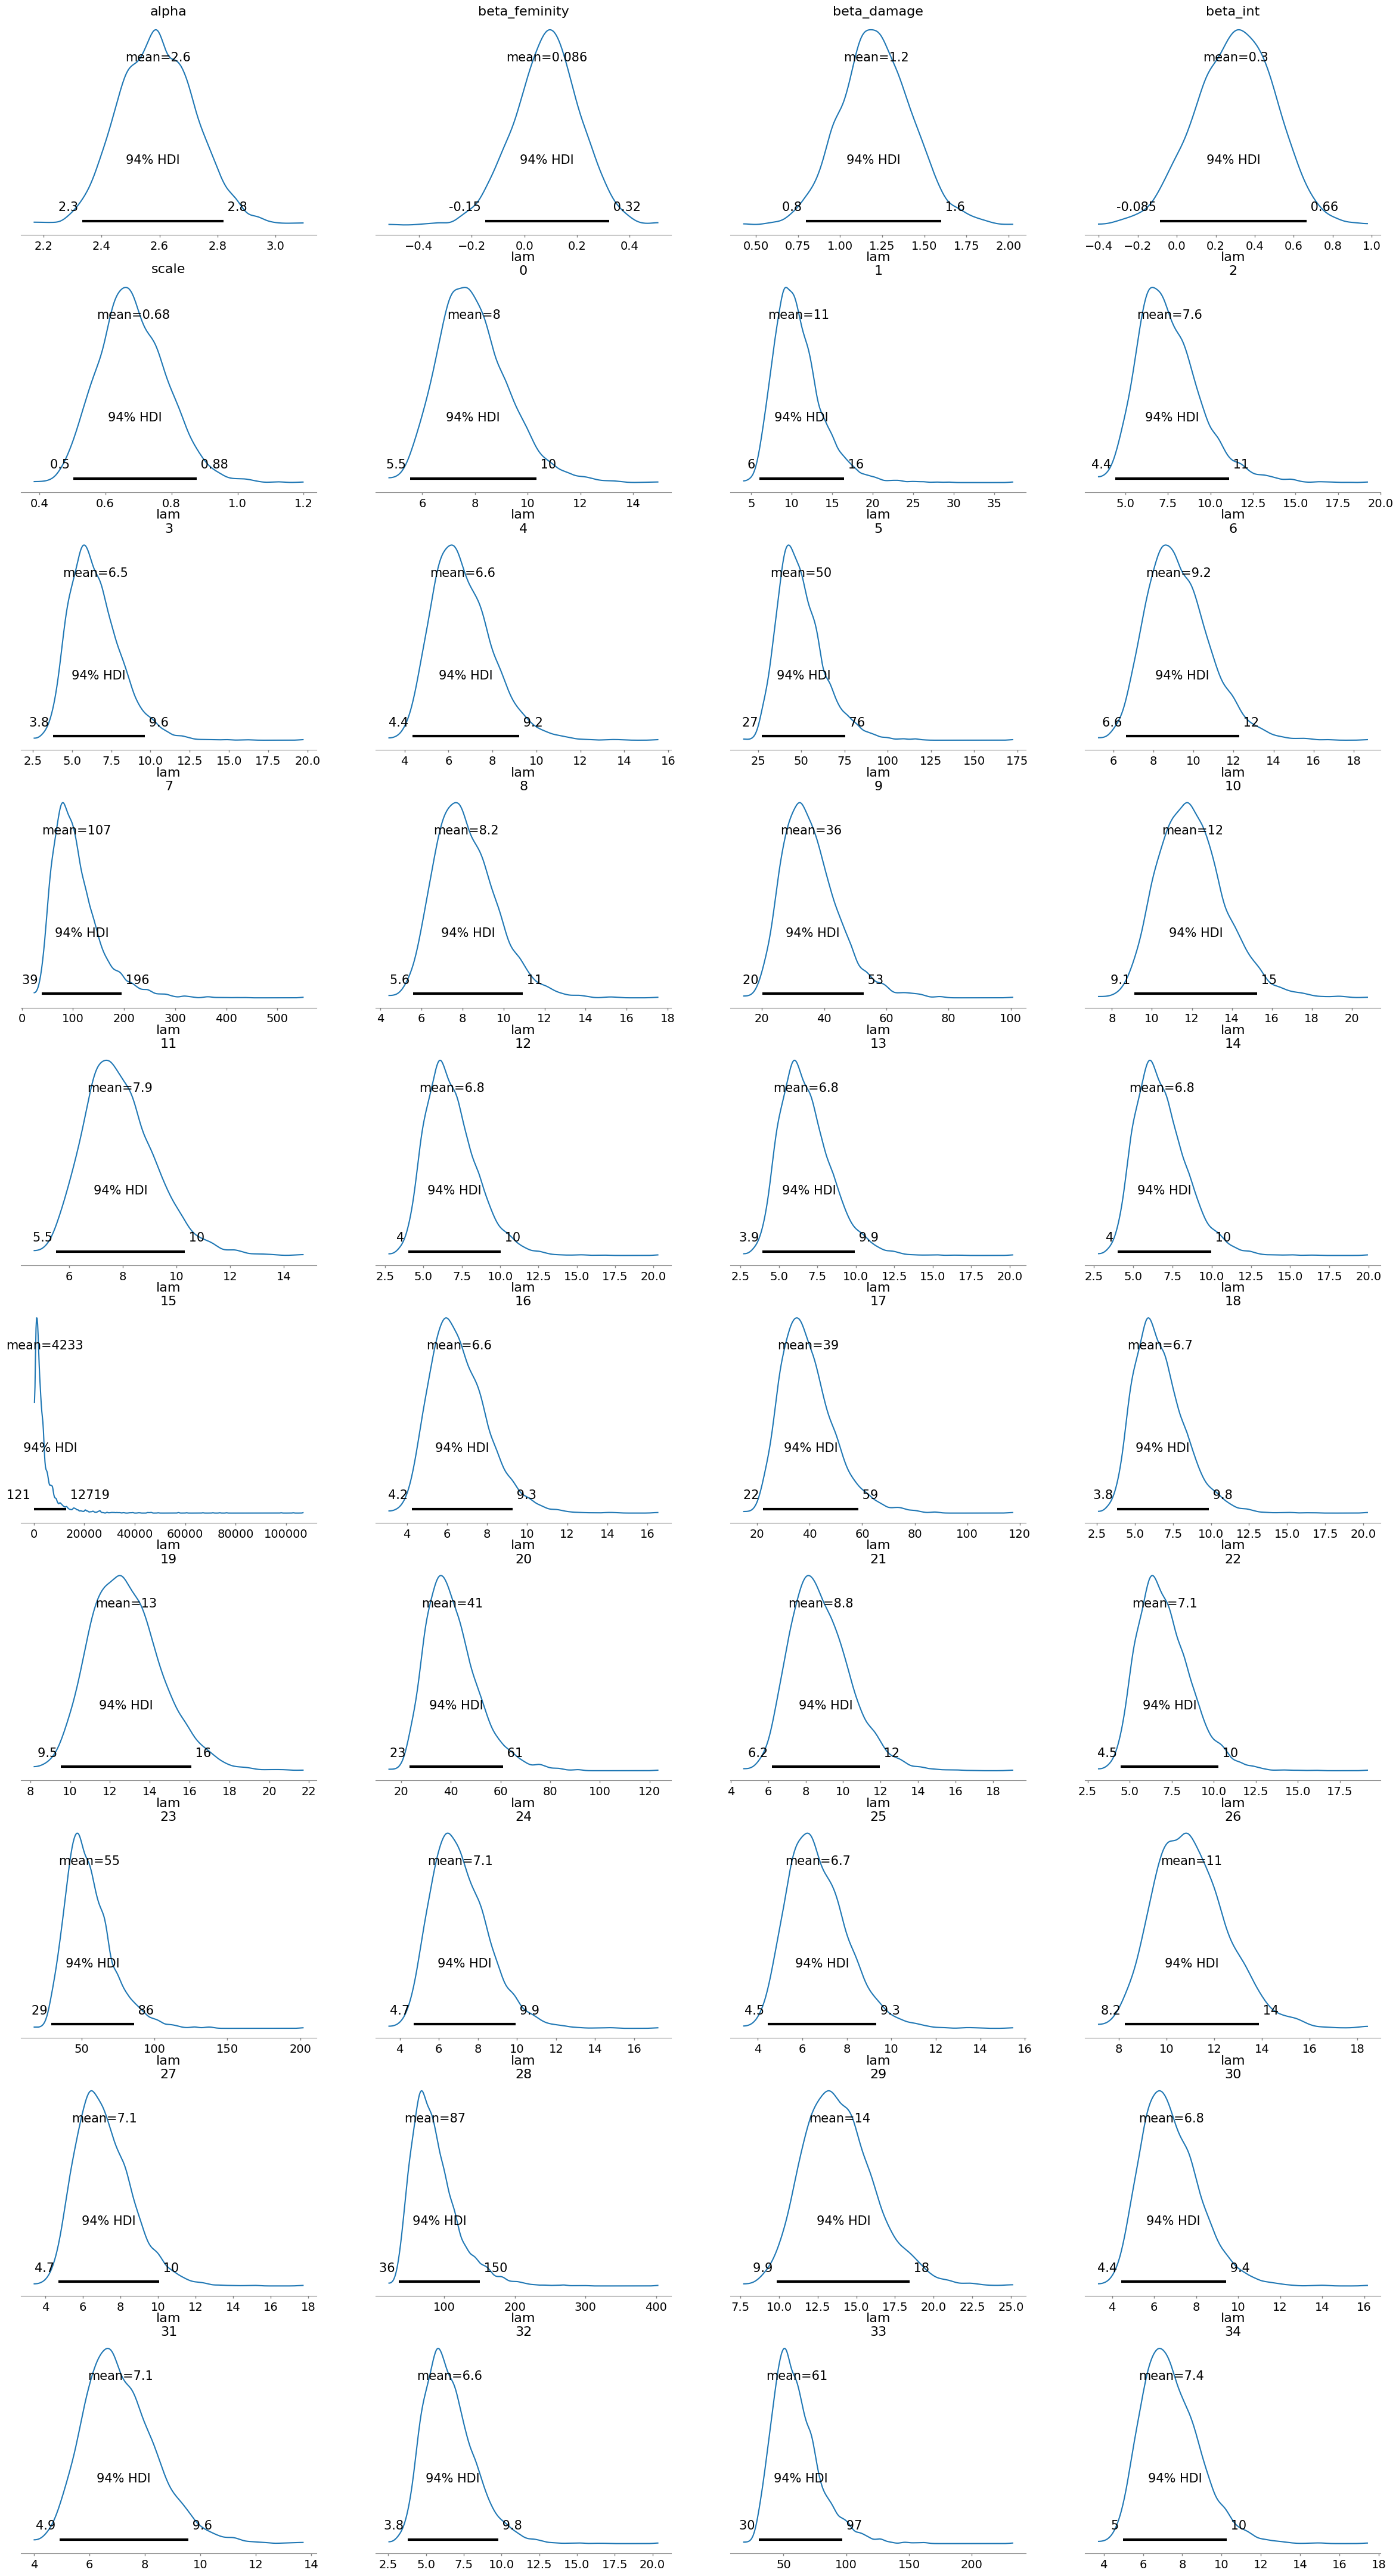

In [216]:
az.plot_posterior(trace_m5);

In [217]:
with pm.Model() as m6:
    femininity = pm.MutableData('femeninity', hurricanes.femininity_std)
    preassure = pm.MutableData('preassure', hurricanes.min_pressure_std)
    alpha = pm.Normal('alpha',0, 4.5)
    beta = pm.Normal('beta_feminity', 0, 0.8)
    beta_preassure = pm.Normal('beta_preassure', 0, 0.8)
    beta_int = pm.Normal('beta_int', 0, 0.8)
    lam = pm.Deterministic('lam', pm.math.exp((alpha 
                                               + beta * femininity 
                                               + beta_preassure * preassure 
                                               + beta_int * preassure * femininity)))
    scale = pm.Exponential('scale',1)
    deaths = pm.NegativeBinomial("deaths", lam, scale, observed=hurricanes.deaths)

In [218]:
with m6:
    trace_m6 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_feminity, beta_preassure, beta_int, scale]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


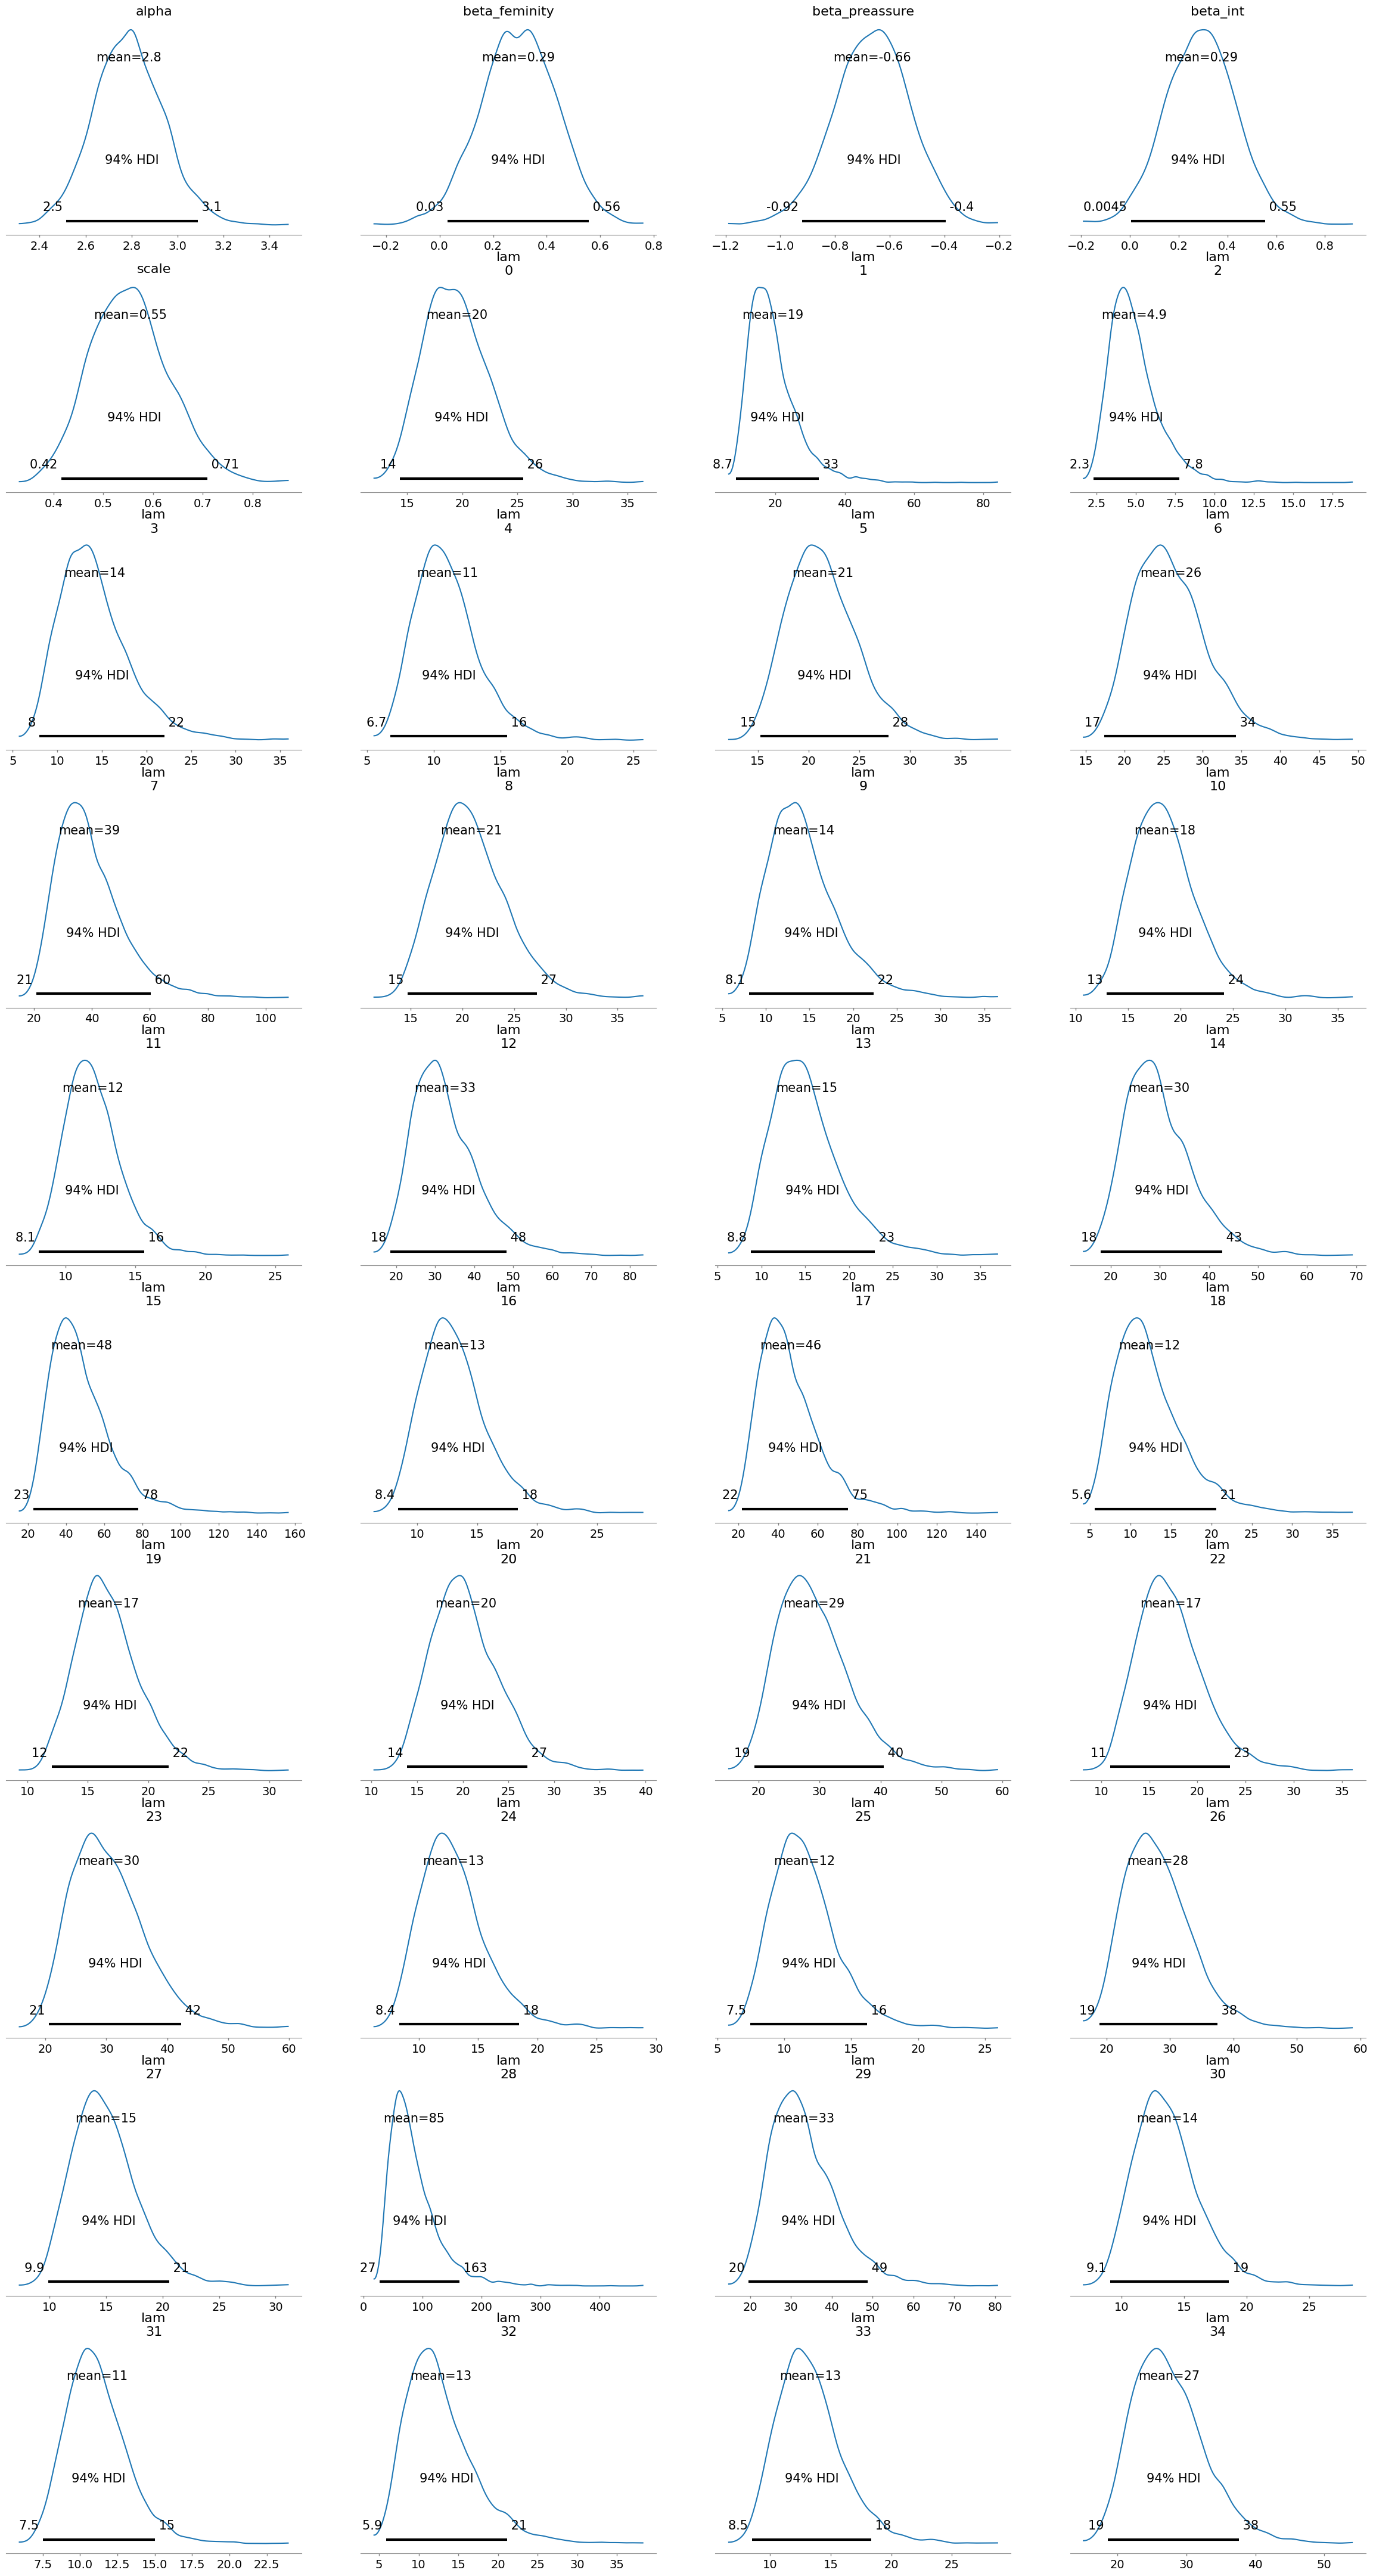

In [220]:
az.plot_posterior(trace_m6);